<a href="https://colab.research.google.com/github/bresgamo/technical-discussion/blob/main/Class_29_09_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

library(haven)
library(tidyverse)
library(dplyr)
library(patchwork)
library(vcov)


In [ ]:
df=read_dta('MincerianEconometriaI (1).dta')
head(df)

directorio,secuencia_p,orden,hogar,edad,genero,edu,year,ing_lab_real_hourN
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl+lbl>,<dbl>,<dbl>,<dbl>
3674397,1,1,1,61,1,4,2015,3154.773
3791150,1,1,1,31,1,2,2015,2366.080
3802124,1,1,1,32,1,5,2015,NA
3679337,1,4,1,24,1,11,2015,2839.296
3766913,1,7,1,34,1,0,2015,1802.728
3658812,1,1,1,47,1,3,2015,1987.507


In [ ]:
df <- df %>%
  rename(ingreso_laboral=ing_lab_real_hourN)

In [ ]:
head(df)

directorio,secuencia_p,orden,hogar,edad,genero,edu,year,ingreso_laboral
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl+lbl>,<dbl>,<dbl>,<dbl>
3674397,1,1,1,61,1,4,2015,3154.773
3791150,1,1,1,31,1,2,2015,2366.080
3802124,1,1,1,32,1,5,2015,NA
3679337,1,4,1,24,1,11,2015,2839.296
3766913,1,7,1,34,1,0,2015,1802.728
3658812,1,1,1,47,1,3,2015,1987.507


In [ ]:
 df=df %>% drop_na()

In [ ]:
df <- df %>%
  unite("key", directorio:hogar)

In [ ]:
#eliminate duplicates
df %>% distinct()

key,edad,genero,edu,year,ingreso_laboral
<chr>,<dbl>,<dbl+lbl>,<dbl>,<dbl>,<dbl>
3674397_1_1_1,61,1,4,2015,3154.773
3791150_1_1_1,31,1,2,2015,2366.080
3679337_1_4_1,24,1,11,2015,2839.296
3766913_1_7_1,34,1,0,2015,1802.728
3658812_1_1_1,47,1,3,2015,1987.507
3878003_1_4_1,15,1,5,2015,1774.560
3757865_1_1_1,47,1,11,2015,4732.160
3703385_1_1_1,49,1,9,2015,2366.080
3693934_1_1_1,54,1,0,2015,1774.560


In [ ]:
summary(df)

     key                 edad           genero            edu       
 Length:290939      Min.   :15.00   Min.   :0.0000   Min.   : 0.00  
 Class :character   1st Qu.:28.00   1st Qu.:0.0000   1st Qu.: 6.00  
 Mode  :character   Median :38.00   Median :1.0000   Median :11.00  
                    Mean   :39.28   Mean   :0.5623   Mean   : 9.99  
                    3rd Qu.:49.00   3rd Qu.:1.0000   3rd Qu.:13.00  
                    Max.   :98.00   Max.   :1.0000   Max.   :26.00  
      year      ingreso_laboral  
 Min.   :2015   Min.   :   1001  
 1st Qu.:2015   1st Qu.:   2839  
 Median :2015   Median :   3845  
 Mean   :2015   Mean   :   6012  
 3rd Qu.:2015   3rd Qu.:   5915  
 Max.   :2015   Max.   :1703578  

In [ ]:
class(df$directorio)
sapply(df, class)

Warning message:
“Unknown or uninitialised column: `directorio`.”


[1] "NULL"

$key
[1] "character"

$edad
[1] "numeric"

$genero
[1] "haven_labelled" "vctrs_vctr"     "double"        

$edu
[1] "numeric"

$year
[1] "numeric"

$ingreso_laboral
[1] "numeric"

Select only the relevant data to calcule the regresion

In [ ]:
df <- df %>% select(edad,genero,edu,ingreso_laboral)


In [ ]:
df=df%>%
  mutate(experiencia=if_else(edad<=15,0, edad-15))

In [ ]:
head(df)

edad,genero,edu,ingreso_laboral,experiencia
<dbl>,<dbl+lbl>,<dbl>,<dbl>,<dbl>
61,1,4,3154.773,46
31,1,2,2366.080,16
24,1,11,2839.296,9
34,1,0,1802.728,19
47,1,3,1987.507,32
15,1,5,1774.560,0


In [ ]:
df$experiencia2=df$experiencia*df$experiencia

In [ ]:
head(df)

edad,genero,edu,ingreso_laboral,experiencia,experiencia2
<dbl>,<dbl+lbl>,<dbl>,<dbl>,<dbl>,<dbl>
61,1,4,3154.773,46,2116
31,1,2,2366.080,16,256
24,1,11,2839.296,9,81
34,1,0,1802.728,19,361
47,1,3,1987.507,32,1024
15,1,5,1774.560,0,0


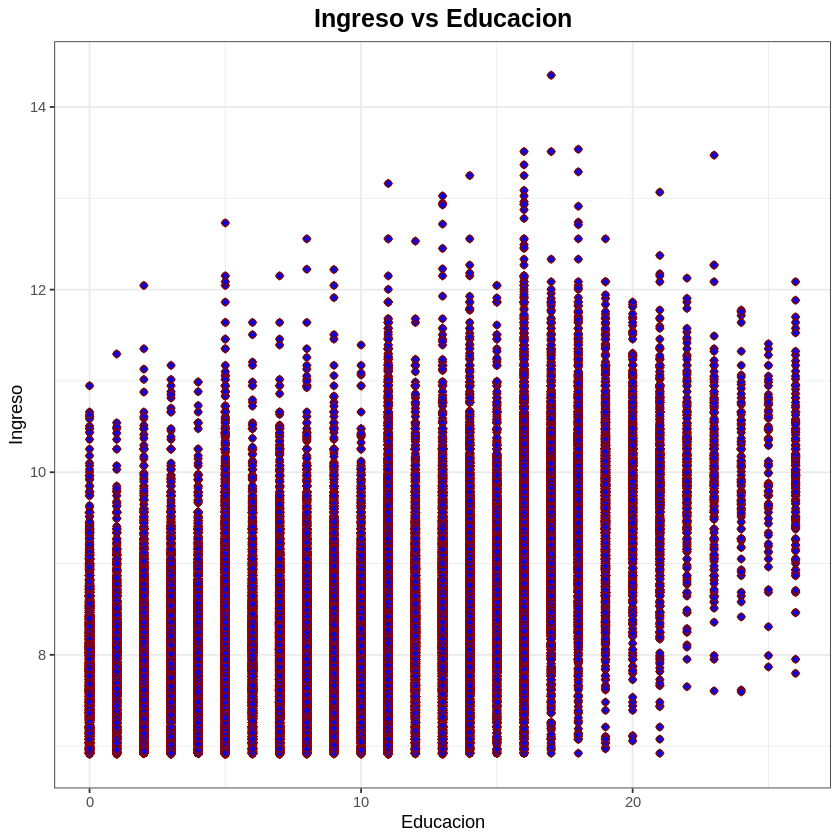

In [ ]:
ggplot(df, aes(x=edu, y=log(ingreso_laboral)))+
geom_point()+
theme_bw()+
labs(
  title= 'Ingreso vs Educacion',
  x='Educacion',
  y='Ingreso'
  )+
geom_point(shape=23, fill='blue', color='darkred')+
theme(plot.title = element_text(size=15, hjust = 0.5,face="bold"))

In [ ]:
minreg= lm(log(ingreso_laboral)~edu + genero + experiencia +experiencia2,data=df )

In [ ]:
summary(minreg)


Call:
lm(formula = log(ingreso_laboral) ~ edu + genero + experiencia + 
    experiencia2, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4583 -0.3630 -0.0295  0.3389  5.2593 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.939e+00  4.822e-03 1439.04   <2e-16 ***
edu           9.371e-02  2.494e-04  375.79   <2e-16 ***
genero        1.757e-01  2.226e-03   78.94   <2e-16 ***
experiencia   2.407e-02  2.933e-04   82.07   <2e-16 ***
experiencia2 -2.474e-04  5.225e-06  -47.35   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.589 on 290934 degrees of freedom
Multiple R-squared:  0.342,	Adjusted R-squared:  0.342 
F-statistic: 3.781e+04 on 4 and 290934 DF,  p-value: < 2.2e-16


In [ ]:
0.0937/0.0002494
# t value es el b estimado sobre la desviación estandar


[1] 375.7017

In [ ]:
vcov(minreg)

,(Intercept),edu,genero,experiencia,experiencia2
(Intercept),2.324852e-05,-7.186116e-07,-3.940084e-06,-9.431265e-07,1.322254e-08
edu,-7.186116e-07,6.218540e-08,7.309763e-08,-2.900495e-09,1.636543e-10
genero,-3.940084e-06,7.309763e-08,4.956587e-06,3.677541e-08,-6.070246e-10
experiencia,-9.431265e-07,-2.900495e-09,3.677541e-08,8.600574e-08,-1.468326e-09
experiencia2,1.322254e-08,1.636543e-10,-6.070246e-10,-1.468326e-09,2.729917e-11


In [ ]:
qnorm(.975)

[1] 1.959964

In [ ]:
qt(.975, nrow(df)-5)


[1] 1.959972

In [ ]:
confint(minreg)

,2.5 %,97.5 %
(Intercept),6.929130502,6.9480311869
edu,0.093222028,0.0941995446
genero,0.171378021,0.1801051476
experiencia,0.023493071,0.0246426629
experiencia2,-0.000257654,-0.0002371728
